<a href="https://colab.research.google.com/github/AstralGoGod/UChicagoPHYS131Labs/blob/main/Copy_of_Period_of_a_Pendulum_(Part_2_Inital_Comparison).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PERIOD OF A PENDULUM (Part 1)

*Last updated 10/5/2022*

This Google Colaboration notebook uses the programming language Python. You don't need to understand how to program in Python yourself to use this notebook. Instead, we will explain what each cell does and where you will need to make edits. Think of it as a **tool** that we'll use to do calculations and produce plots.

This particular cell is a **text** cell, but you'll notice that some of the cells below contain **code**. To exectute the code inside a cell, click the cell and press `shift+enter` or click the run icon that appears when hovering over the top-left corner of the cell. Run the cells wihin a section from top to bottom, stopping to read the notes before/after each cell to make sure you know what is going on.

Try it with the cell below! Execute it by pressing `shift+enter` (and selecting "Run Anyway" if a warning box pops up).

In [ ]:
print('Hello World')

Hello World


The sections below are broken up into different parts. Remember to run the parts from top to bottom.

*Note that if the cells below are collapsed, you can click the little triangle next to the header to expand the cells*.

# Preliminary cells
These cells load libraries and define some useful functions. Later when you have more time, you can look closely at the code and try to understand what it is doing, but for now you can just run the cells by clicking `shift+enter` and moving on. (There is no output.)

In [34]:
# These lines load important libraries into memory
import numpy as np
from matplotlib import pyplot as plt

# Below are several functions we want to define
def average(x):
    sum = 0                  # initializes our running total to be zero and calls it "sum"
    for number in x:         # makes a loop over the list "x"
        sum = sum + number   # adds the current item in the list (called "number" to the running total (called "sum")
    return(sum / len(x))     # divides the total by the number of items in the list

def standard_deviation(x):
    avg = average(x)
    variance = 0                                # initializes our running total to be zero and calls it "variance"
    for number in x:                            # makes a loop over the list "x"
        variance = variance + (number - avg)**2 # adds the square of the difference between each item and the average
    return(np.sqrt(variance/(len(x)-1)))        # divides the total by N-1

def standard_error(x):
    return(standard_deviation(x))/np.sqrt(len(x)) # divides the standard deviation by sqrt of the number of points

def t_prime(A, dA, B, dB=0):               # Calculates the t_prime value between A +/- dA and B +/- B
    return((A-B)/np.sqrt(dA**2 + dB**2))   # If only 3 arguments are given, assumes dB = 0 (e.g. a literature value)

In [35]:
# These lines control how our figures look
%matplotlib inline
plt.rcParams['figure.dpi'] = 160 #Change this value to make your picture bigger or smaller

# Dropping paper
You can use these cells to calculate the statistics for your paper drop times (mean, standard deviation and standard error) and then make a scatter plot to visualize the data.


The next cell contains a list of numbers inside square brackets. This will be where you enter your list of values for the measured drop times. **Edit** this cell to use your own times in units of *seconds*. Make sure that numbers are separated by commas and that the list is inside square brackets (e.g. `time = [1.0, 2.2, 3.8]`).



In [36]:
times = [1.24,1.44,1.25,0.95,0.53,0.95,1.10,1.25,0.96,0.95]

Let's perform some calculations on your data.

In [37]:
mean = average(times)
std_dev = standard_deviation(times)
std_err = standard_error(times)

print("Average fall time is {:0.2f} sec".format(mean))
print("Standard deviation is {:0.2f} sec".format(std_dev))
print("Standard error (SE) is {:0.2f} sec".format(std_err))

Average fall time is 1.06 sec
Standard deviation is 0.25 sec
Standard error (SE) is 0.08 sec


Finally, let's make a scatter plot of your data.

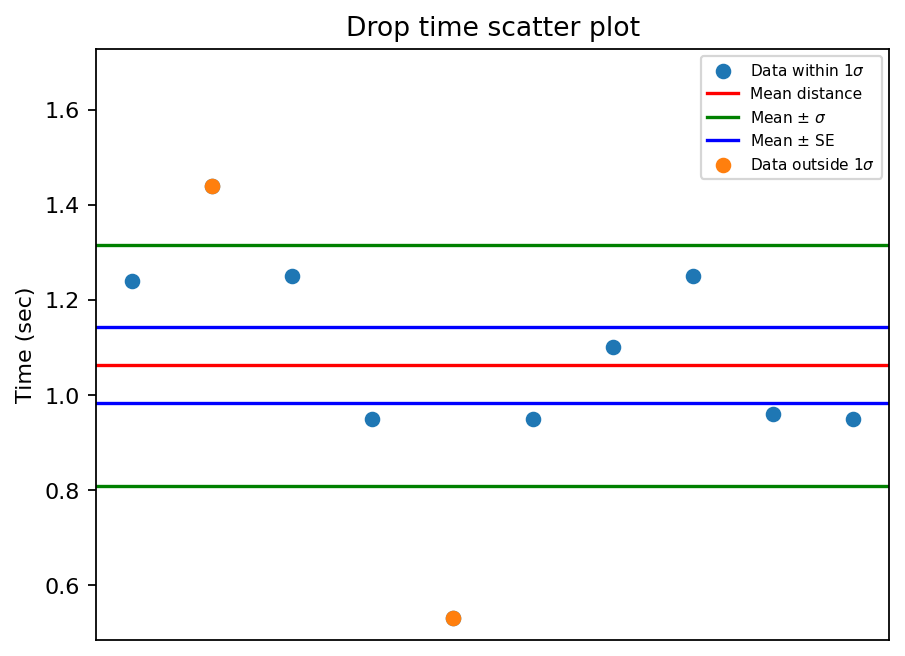

In [38]:
index = np.linspace(1,len(times),len(times))
fig,ax = plt.subplots()
ax.scatter(index,times,label = "Data within 1$\sigma$")
ax.axhline(mean,color='r',label="Mean distance")
ax.axhline(mean+std_dev,color='g',label="Mean $\pm$ $\sigma$")
ax.axhline(mean-std_dev,color='g')
ax.axhline(mean+std_err,color='b',label="Mean $\pm$ SE")
ax.axhline(mean-std_err,color='b')

times = np.array(times)
outside_sigma = np.logical_or( times > mean+std_dev, times < mean-std_dev)
ax.scatter(index[outside_sigma], times[outside_sigma],
           label = "Data outside 1$\sigma$")

ax.set_title("Drop time scatter plot")
ax.set_ylabel("Time (sec)")
ax.set_ylim(top=1.2*max(times))
plt.xticks([])
ax.legend(fontsize="x-small")
plt.show()

Now save your image (right click and select "save image as") and put a copy in your lab notebook!

# Building a pendulum
You may now use this section to compute statistics and plot your period for your pendulum.

**Edit** the first line here by entering the length of the pendulum. The rest of the code will will calculate the predicted period.

In [39]:
# L is the length of your pendulum (in meters)
L = 1.037

# T_predicted is the value of the period predicted from the formula (in seconds)
T_predicted = 2*np.pi*np.sqrt(L/9.81)

print("Predicted Period: T = ", T_predicted, "seconds")

Predicted Period: T =  2.0428418338122407 seconds


Enter the list of measured periods for each angle you studied.

*If you measure at different angles than the ones listed below, follow the naming pattern. For example, if you measure at $8^{\circ}$, you can add a line of code* `T8 = [...]` *for the measured periods at that angle.*

In [56]:
# T5 and T10 are lists of your measured periods of 5 and 10 degrees, respectively
T3 = [2.03,2.06,2.01]
T5 = [2.10,2.06,2.01]
T7 = [2.05,2.06,2.00]
T10 = [2.04,2.02,2.07]



print("periods at 3 degrees:", T3)
print("periods at 5 degrees:", T5)
print("periods at 7 degrees:", T7)
print("periods at 10 degrees:", T10)

periods at 3 degrees: [2.03, 2.06, 2.01]
periods at 5 degrees: [2.1, 2.06, 2.01]
periods at 7 degrees: [2.05, 2.06, 2.0]
periods at 10 degrees: [2.04, 2.02, 2.07]


Next, compute the average and standard error for these two lists of data.

*Again, if you measured at different angles, use the naming pattern to add the appropriate lines of code.*

In [57]:
avg3 = average(T3)
avg5 = average(T5)
avg7 = average(T7)
avg10 = average(T10)

davg3 = standard_error(T3)
davg5 = standard_error(T5)
davg7 = standard_error(T7)
davg10 = standard_error(T10)

print("T_3 = ", avg3, "+/-", davg3)
print("T_5 = ", avg5, "+/-", davg5)
print("T_7 = ", avg7, "+/-", davg7)
print("T_10 = ", avg10, "+/-", davg10)

T_3 =  2.033333333333333 +/- 0.014529663145135659
T_5 =  2.0566666666666666 +/- 0.026034165586355604
T_7 =  2.0366666666666666 +/- 0.018559214542766732
T_10 =  2.0433333333333334 +/- 0.014529663145135523


Next, we can plot the data against the predicted value.

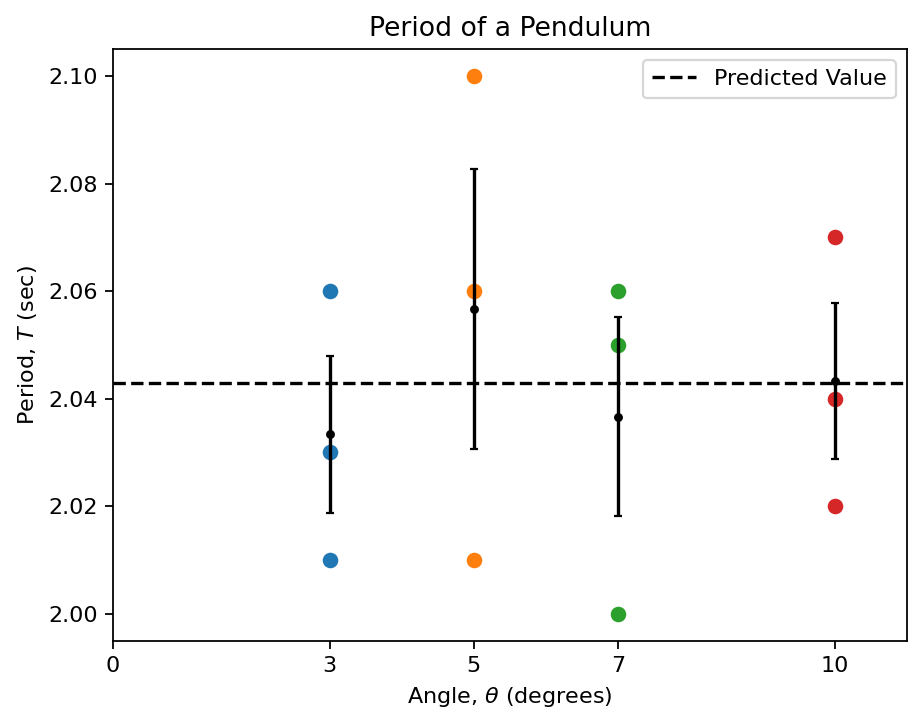

In [60]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Predicted Value')
plt.plot(3*np.ones(len(T3)), T3, 'o')
plt.plot(5*np.ones(len(T5)), T5, 'o')
plt.plot(7*np.ones(len(T7)), T7, 'o')
plt.plot(10*np.ones(len(T10)), T10, 'o')
plt.errorbar([3,5,7,10], [avg3,avg5,avg7, avg10], [davg3,davg5, davg7,davg10], fmt = 'k.', capsize=2)
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([0, 11])
plt.xticks([0,3,5,7,10])
plt.legend()
plt.show()

Finally, we check the $t^{\prime}$ value at each angle to see if we have agreement with the predicted value.

In [61]:
std_dev3 = standard_deviation(T3)
std_dev5 = standard_deviation(T5)
std_dev7 = standard_deviation(T7)
std_dev10 = standard_deviation(T10)

std_err3 = standard_error(T3)
std_err5 = standard_error(T5)
std_err7 = standard_error(T7)
std_err10 = standard_error(T10)

print("Standard deviation at 3 Degrees is {:0.2f} sec".format(std_dev3))
print("Standard deviation at 5 Degrees is {:0.2f} sec".format(std_dev5))
print("Standard deviation at 7 Degrees is {:0.2f} sec".format(std_dev7))
print("Standard deviation at 10 Degrees is {:0.2f} sec".format(std_dev10))
print("Standard error (SE) at 3 Degrees is {:0.2f} sec".format(std_err3))
print("Standard error (SE) at 5 Degrees is {:0.2f} sec".format(std_err5))
print("Standard error (SE) at 7 Degrees is {:0.2f} sec".format(std_err7))
print("Standard error (SE) at 10 Degrees is {:0.2f} sec".format(std_err10))

print("For 3 degrees, t' =", t_prime(avg3, davg3, T_predicted))
print("For 5 degrees, t' =", t_prime(avg5, davg5, T_predicted))
print("For 7 degrees, t' =", t_prime(avg7, davg7, T_predicted))
print("For 10 degrees, t' =", t_prime(avg10, davg10, T_predicted))

Standard deviation at 3 Degrees is 0.03 sec
Standard deviation at 5 Degrees is 0.05 sec
Standard deviation at 7 Degrees is 0.03 sec
Standard deviation at 10 Degrees is 0.03 sec
Standard error (SE) at 3 Degrees is 0.01 sec
Standard error (SE) at 5 Degrees is 0.03 sec
Standard error (SE) at 7 Degrees is 0.02 sec
Standard error (SE) at 10 Degrees is 0.01 sec
For 3 degrees, t' = -0.654419884613142
For 5 degrees, t' = 0.5310265392823446
For 7 degrees, t' = -0.3327278280739957
For 10 degrees, t' = 0.03382731699855568
